In [1]:
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import StandardScaler

from keras.datasets import cifar10

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



Using TensorFlow backend.


In [2]:
tf.__version__

'2.0.0'

## Get and transform the data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32') 

In [6]:
X_train /= 255
X_test  /= 255

In [7]:
X_train = X_train[5000:]
y_train = y_train[5000:]
X_valid = X_train[:5000]
y_valid = y_train[:5000]

## Build a model

### Genral config

In [11]:
n_layers  = 20
n_neurons = 100

### Approach 1 
* ELU + He Normal + Nadam 5e-5

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten(input_shape = [32, 32, 3]))

for i in range(n_layers):
    model.add(tf.keras.layers.Dense(100, 
                                    kernel_initializer = 'he_normal',
                                    activation = 'elu'))
    
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [13]:
optimizer = tf.keras.optimizers.Nadam(lr = 5e-5)

model.compile(loss      = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics   = ['accuracy'])

In [14]:
# model.summary()

In [15]:
# Define callbacks
early_stopping_cb   = tf.keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model_1.h5", save_best_only = True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [16]:
# Fit the model
model.fit(X_train, y_train,
          epochs          = 100,
          validation_data = (X_valid, y_valid),
          callbacks       = callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 19s 430us/sample - loss: 1.9144 - accuracy: 0.3078 - val_loss: 1.8501 - val_accuracy: 0.3248
Epoch 2/100
45000/45000 [==============================] - 16s 359us/sample - loss: 1.7078 - accuracy: 0.3818 - val_loss: 1.7399 - val_accuracy: 0.3650
Epoch 3/100
45000/45000 [==============================] - 16s 362us/sample - loss: 1.6226 - accuracy: 0.4154 - val_loss: 1.7556 - val_accuracy: 0.3664
Epoch 4/100
45000/45000 [==============================] - 16s 364us/sample - loss: 1.5605 - accuracy: 0.4400 - val_loss: 1.5436 - val_accuracy: 0.4384
Epoch 5/100
45000/45000 [==============================] - 16s 361us/sample - loss: 1.5167 - accuracy: 0.4534 - val_loss: 1.4669 - val_accuracy: 0.4630
Epoch 6/100
45000/45000 [==============================] - 16s 365us/sample - loss: 1.4815 - accuracy: 0.4668 - val_loss: 1.4673 - val_accuracy: 0.4670
Epoch 7/100
45000/45000 [==============

45000/45000 [==============================] - 15s 343us/sample - loss: 0.7953 - accuracy: 0.7165 - val_loss: 0.7881 - val_accuracy: 0.7208
Epoch 55/100
45000/45000 [==============================] - 16s 345us/sample - loss: 0.7831 - accuracy: 0.7203 - val_loss: 0.7732 - val_accuracy: 0.7262
Epoch 56/100
45000/45000 [==============================] - 18s 391us/sample - loss: 0.7777 - accuracy: 0.7196 - val_loss: 0.7321 - val_accuracy: 0.7370
Epoch 57/100
45000/45000 [==============================] - 17s 372us/sample - loss: 0.7692 - accuracy: 0.7276 - val_loss: 0.7263 - val_accuracy: 0.7462
Epoch 58/100
45000/45000 [==============================] - 16s 353us/sample - loss: 0.7550 - accuracy: 0.7292 - val_loss: 0.7154 - val_accuracy: 0.7454
Epoch 59/100
45000/45000 [==============================] - 18s 406us/sample - loss: 0.7447 - accuracy: 0.7340 - val_loss: 0.7166 - val_accuracy: 0.7422
Epoch 60/100
45000/45000 [==============================] - 17s 378us/sample - loss: 0.7373 - a

In [29]:
loss_1     = model.history.history['loss']
val_loss_1 = model.history.history['val_loss']
acc_1      = model.history.history['accuracy']
val_acc_1  = model.history.history['val_accuracy']

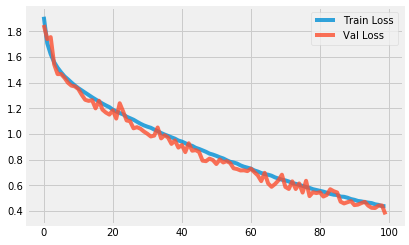

In [31]:
plt.plot(loss_1, label = 'Train Loss', alpha = .8)
plt.plot(val_loss_1, label = 'Val Loss', alpha = .8)
# plt.plot(acc_1, label = 'Train Acc', alpha = .8)
# plt.plot(val_acc_1, label = 'Val Acc', alpha = .8)
plt.legend()
plt.title('Model 1')
plt.show()

### Approach 2
* ELU + He Normal + Nadam 5e-4 + Batch Norm

In [58]:
model_2 = tf.keras.models.Sequential()

In [59]:
model_2.add(tf.keras.layers.Flatten(input_shape = [32, 32, 3]))
model_2.add(tf.keras.layers.BatchNormalization())

for i in range(n_layers):
    model_2.add(tf.keras.layers.Dense(100, 
                                      kernel_initializer = 'he_normal',
                                      use_bias   = False))
    
    model_2.add(tf.keras.layers.BatchNormalization())
    model_2.add(tf.keras.layers.Activation('elu'))
    
model_2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [60]:
optimizer = tf.keras.optimizers.Nadam(lr = 5e-4)

In [61]:
model_2.compile(loss      = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics   = ['accuracy'])

In [62]:
# model_2.summary()

In [63]:
# Define callbacks
early_stopping_cb   = tf.keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model_2.h5", save_best_only = True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [64]:
# Fit the model
model_2.fit(X_train, y_train,
          epochs          = 100,
          validation_data = (X_valid, y_valid),
          callbacks       = callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 31s 692us/sample - loss: 1.8430 - accuracy: 0.3400 - val_loss: 1.6447 - val_accuracy: 0.4102
Epoch 2/100
45000/45000 [==============================] - 22s 488us/sample - loss: 1.6726 - accuracy: 0.4040 - val_loss: 1.5380 - val_accuracy: 0.4386
Epoch 3/100
45000/45000 [==============================] - 22s 478us/sample - loss: 1.6028 - accuracy: 0.4305 - val_loss: 1.4554 - val_accuracy: 0.4724
Epoch 4/100
45000/45000 [==============================] - 22s 478us/sample - loss: 1.5513 - accuracy: 0.4510 - val_loss: 1.3903 - val_accuracy: 0.5068
Epoch 5/100
45000/45000 [==============================] - 22s 494us/sample - loss: 1.5052 - accuracy: 0.4648 - val_loss: 1.3572 - val_accuracy: 0.5180
Epoch 6/100
45000/45000 [==============================] - 23s 515us/sample - loss: 1.4674 - accuracy: 0.4769 - val_loss: 1.3026 - val_accuracy: 0.5398
Epoch 7/100
45000/45000 [==============

45000/45000 [==============================] - 22s 481us/sample - loss: 0.8758 - accuracy: 0.6938 - val_loss: 0.6517 - val_accuracy: 0.7694
Epoch 55/100
45000/45000 [==============================] - 22s 484us/sample - loss: 0.8588 - accuracy: 0.6966 - val_loss: 0.6320 - val_accuracy: 0.7836
Epoch 56/100
45000/45000 [==============================] - 22s 488us/sample - loss: 0.8513 - accuracy: 0.6993 - val_loss: 0.6213 - val_accuracy: 0.7922
Epoch 57/100
45000/45000 [==============================] - 22s 485us/sample - loss: 0.8439 - accuracy: 0.7030 - val_loss: 0.6064 - val_accuracy: 0.7926
Epoch 58/100
45000/45000 [==============================] - 22s 484us/sample - loss: 0.8408 - accuracy: 0.7036 - val_loss: 0.5987 - val_accuracy: 0.7988
Epoch 59/100
45000/45000 [==============================] - 22s 485us/sample - loss: 0.8339 - accuracy: 0.7072 - val_loss: 0.5962 - val_accuracy: 0.7992
Epoch 60/100
45000/45000 [==============================] - 22s 481us/sample - loss: 0.8295 - a

In [65]:
loss_2     = model_2.history.history['loss']
val_loss_2 = model_2.history.history['val_loss']
acc_2      = model_2.history.history['accuracy']
val_acc_2  = model_2.history.history['val_accuracy']

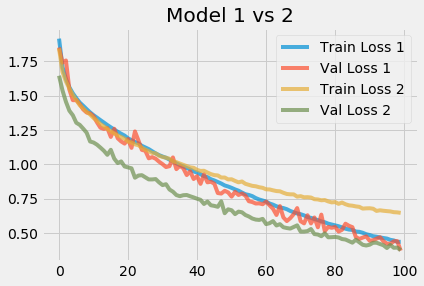

In [66]:
plt.plot(loss_1, label = 'Train Loss 1', alpha = .7)
plt.plot(val_loss_1, label = 'Val Loss 1', alpha = .7)
plt.plot(loss_2, label = 'Train Loss 2', alpha = .7)
plt.plot(val_loss_2, label = 'Val Loss 2', alpha = .7)
# plt.plot(acc_2, label = 'Train Acc', alpha = .8)
# plt.plot(val_acc_2, label = 'Val Acc', alpha = .8)
plt.legend()
plt.title('Model 1 vs 2')
plt.show()

### Approach 3
* SELU + LeCun Normal + Nadam 5e-4 

In [125]:
model_3 = tf.keras.models.Sequential()

In [126]:
model_3.add(tf.keras.layers.Flatten(input_shape = [32, 32, 3]))

for i in range(n_layers):
    model_3.add(tf.keras.layers.Dense(100, 
                                      kernel_initializer = 'lecun_normal',
                                      activation         = 'selu'))
    
model_3.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [127]:
optimizer = tf.keras.optimizers.Nadam(lr = 5e-4)

In [128]:
model_3.compile(loss      = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics   = ['accuracy'])

In [129]:
# model_3.summary()

In [130]:
# Define callbacks
early_stopping_cb   = tf.keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model_3.h5", save_best_only = True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [8]:
# SELU requires standardization
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled  = (X_test - X_means) / X_stds

In [132]:
# Fit the model
model_3.fit(X_train_scaled, y_train,
          epochs          = 100,
          validation_data = (X_valid_scaled, y_valid),
          callbacks       = callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 20s 440us/sample - loss: 1.8856 - accuracy: 0.3249 - val_loss: 1.7302 - val_accuracy: 0.3838
Epoch 2/100
45000/45000 [==============================] - 15s 339us/sample - loss: 1.6682 - accuracy: 0.4061 - val_loss: 1.5891 - val_accuracy: 0.4384
Epoch 3/100
45000/45000 [==============================] - 16s 359us/sample - loss: 1.5683 - accuracy: 0.4442 - val_loss: 1.4805 - val_accuracy: 0.4636
Epoch 4/100
45000/45000 [==============================] - 15s 336us/sample - loss: 1.4981 - accuracy: 0.4710 - val_loss: 1.4278 - val_accuracy: 0.4888
Epoch 5/100
45000/45000 [==============================] - 15s 337us/sample - loss: 1.4392 - accuracy: 0.4920 - val_loss: 1.3510 - val_accuracy: 0.5156
Epoch 6/100
45000/45000 [==============================] - 15s 338us/sample - loss: 1.3861 - accuracy: 0.5120 - val_loss: 1.2927 - val_accuracy: 0.5540
Epoch 7/100
45000/45000 [==============

45000/45000 [==============================] - 18s 396us/sample - loss: 0.5994 - accuracy: 0.8008 - val_loss: 0.5504 - val_accuracy: 0.8216
Epoch 55/100
45000/45000 [==============================] - 19s 419us/sample - loss: 0.7403 - accuracy: 0.7550 - val_loss: 0.6515 - val_accuracy: 0.7918
Epoch 56/100
45000/45000 [==============================] - 20s 435us/sample - loss: 0.6469 - accuracy: 0.7858 - val_loss: 0.5426 - val_accuracy: 0.8272
Epoch 57/100
45000/45000 [==============================] - 20s 438us/sample - loss: 0.5923 - accuracy: 0.8052 - val_loss: 0.5214 - val_accuracy: 0.8250
Epoch 58/100
45000/45000 [==============================] - 20s 441us/sample - loss: 0.5827 - accuracy: 0.8066 - val_loss: 0.5361 - val_accuracy: 0.8260
Epoch 59/100
45000/45000 [==============================] - 19s 430us/sample - loss: 0.5887 - accuracy: 0.8075 - val_loss: 0.5240 - val_accuracy: 0.8300
Epoch 60/100
45000/45000 [==============================] - 19s 430us/sample - loss: 0.5986 - a

In [133]:
loss_3     = model_3.history.history['loss']
val_loss_3 = model_3.history.history['val_loss']
acc_3      = model_3.history.history['accuracy']
val_acc_3  = model_3.history.history['val_accuracy']

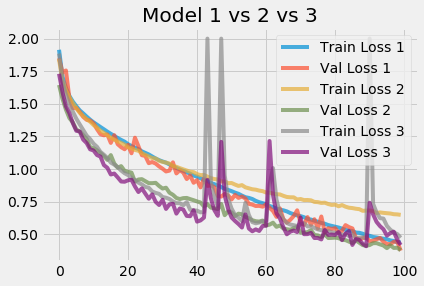

In [134]:
plt.plot(loss_1, label = 'Train Loss 1', alpha = .7)
plt.plot(val_loss_1, label = 'Val Loss 1', alpha = .7)
plt.plot(loss_2, label = 'Train Loss 2', alpha = .7)
plt.plot(val_loss_2, label = 'Val Loss 2', alpha = .7)
plt.plot(np.clip(loss_3, 0, 2), label = 'Train Loss 3', alpha = .7)
plt.plot(val_loss_3, label = 'Val Loss 3', alpha = .7)
# plt.plot(acc_2, label = 'Train Acc', alpha = .8)
# plt.plot(val_acc_2, label = 'Val Acc', alpha = .8)
plt.legend()
plt.title('Model 1 vs 2 vs 3')
plt.show()

### Approach 4
* SELU + LeCun Normal + Nadam 5e-4 + AlphaDropout

In [9]:
model_4 = tf.keras.models.Sequential()

In [12]:
model_4.add(tf.keras.layers.Flatten(input_shape = [32, 32, 3]))

for i in range(n_layers):
    model_4.add(tf.keras.layers.Dense(100, 
                                      kernel_initializer = 'lecun_normal',
                                      activation         = 'selu'))

model_4.add(tf.keras.layers.AlphaDropout(rate = .1))
model_4.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [13]:
optimizer = tf.keras.optimizers.Nadam(lr = 5e-4)

In [14]:
model_4.compile(loss      = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics   = ['accuracy'])

In [15]:
# model_4.summary()

In [16]:
# Define callbacks
early_stopping_cb   = tf.keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model_4.h5", save_best_only = True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [17]:
# Fit the model
model_4.fit(X_train_scaled, y_train,
          epochs          = 100,
          validation_data = (X_valid_scaled, y_valid),
          callbacks       = callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 20s 437us/sample - loss: 1.8787 - accuracy: 0.3297 - val_loss: 1.7264 - val_accuracy: 0.3956
Epoch 2/100
45000/45000 [==============================] - 16s 346us/sample - loss: 1.6615 - accuracy: 0.4109 - val_loss: 1.5428 - val_accuracy: 0.4600
Epoch 3/100
45000/45000 [==============================] - 16s 364us/sample - loss: 1.5708 - accuracy: 0.4408 - val_loss: 1.5039 - val_accuracy: 0.4500
Epoch 4/100
45000/45000 [==============================] - 16s 357us/sample - loss: 1.5005 - accuracy: 0.4733 - val_loss: 1.4459 - val_accuracy: 0.4884
Epoch 5/100
45000/45000 [==============================] - 16s 358us/sample - loss: 1.4483 - accuracy: 0.4893 - val_loss: 1.3814 - val_accuracy: 0.5212
Epoch 6/100
45000/45000 [==============================] - 16s 359us/sample - loss: 1.4004 - accuracy: 0.5055 - val_loss: 1.3387 - val_accuracy: 0.5356
Epoch 7/100
45000/45000 [==============

45000/45000 [==============================] - 16s 349us/sample - loss: 31.2482 - accuracy: 0.7438 - val_loss: 1.5356 - val_accuracy: 0.4978
Epoch 55/100
45000/45000 [==============================] - 16s 346us/sample - loss: 1.4099 - accuracy: 0.5253 - val_loss: 1.3150 - val_accuracy: 0.5532
Epoch 56/100
45000/45000 [==============================] - 16s 346us/sample - loss: 1.2642 - accuracy: 0.5736 - val_loss: 1.1899 - val_accuracy: 0.6010
Epoch 57/100
45000/45000 [==============================] - 16s 346us/sample - loss: 1.1604 - accuracy: 0.6098 - val_loss: 1.0944 - val_accuracy: 0.6324
Epoch 58/100
45000/45000 [==============================] - 16s 347us/sample - loss: 1.0740 - accuracy: 0.6375 - val_loss: 1.0108 - val_accuracy: 0.6596
Epoch 59/100
45000/45000 [==============================] - 16s 350us/sample - loss: 1.0033 - accuracy: 0.6641 - val_loss: 0.9213 - val_accuracy: 0.6884
Epoch 60/100
45000/45000 [==============================] - 16s 346us/sample - loss: 0.9205 - 

In [18]:
loss_4     = model_4.history.history['loss']
val_loss_4 = model_4.history.history['val_loss']
acc_4      = model_4.history.history['accuracy']
val_acc_4  = model_4.history.history['val_accuracy']

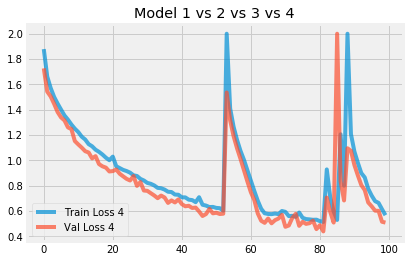

In [20]:
# plt.plot(loss_1, label = 'Train Loss 1', alpha = .7)
# plt.plot(val_loss_1, label = 'Val Loss 1', alpha = .7)
# plt.plot(loss_2, label = 'Train Loss 2', alpha = .7)
# plt.plot(val_loss_2, label = 'Val Loss 2', alpha = .7)
# plt.plot(np.clip(loss_3, 0, 2), label = 'Train Loss 3', alpha = .7)
# plt.plot(val_loss_3, label = 'Val Loss 3', alpha = .7)
plt.plot(np.clip(loss_4, 0, 2), label = 'Train Loss 4', alpha = .7)
plt.plot(np.clip(val_loss_4, 0, 2), label = 'Val Loss 4', alpha = .7)
# plt.plot(acc_2, label = 'Train Acc', alpha = .8)
# plt.plot(val_acc_2, label = 'Val Acc', alpha = .8)
plt.legend()
plt.title('Model 1 vs 2 vs 3 vs 4')
plt.show()